# Feature Engineering
- Drop Unwanted Features
- Handle Missing values
- Handle Categorical Features
- Handle Feature Scaling
- Remove Outliers

As per the Exploratory Data Analysis

- No missing values are present
- No features are found with only one value
- There are Nine Categorical features
- Credit default feature doesn't play any important role
- There are few outliers present in Features (Age, Bank balance, Call duration,Previous campaign contact, Previous Outcome)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r"C:\Users\amaan\Desktop\Datasets\bank_data.csv")
df = df.drop(columns=['Unnamed: 0'])

In [43]:
df2=df.copy()

In [44]:
df2.head()

,Age,Job,Marital,education,Credit_default,Bank_balance,Housing_loan,Personal_loan,Contact_type,Last_Contact_day,Last_contact_month,Call_Duration,Current_campaign_contact,Days_since_prev_contact,Prev_campaign_contacts,Prev_outcome,Term_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [45]:
df2.shape

(11162, 17)

In [46]:
#defaut features does not play imp role
df2.groupby(['Term_deposit','Credit_default']).size()

Term_deposit  Credit_default
no            no                5757
              yes                116
yes           no                5237
              yes                 52
dtype: int64

In [47]:
df2.drop(['Credit_default'],axis=1, inplace=True)

In [48]:
df2.groupby(['Term_deposit','Days_since_prev_contact']).size()

Term_deposit  Days_since_prev_contact
no            -1                         4940
               1                            2
               2                            6
               5                            2
               6                            2
                                         ... 
yes            804                          1
               805                          1
               828                          1
               842                          1
               854                          1
Length: 732, dtype: int64

In [49]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['Days_since_prev_contact'],axis=1, inplace=True)

In [50]:
# remove outliers in feature age...
df2.groupby('Age',sort=True)['Age'].count()
# these can be ignored and values lies in between 18 to 95

Age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: Age, Length: 76, dtype: int64

In [51]:
# remove outliers in feature balance...
df2.groupby(['Term_deposit','Bank_balance'],sort=True)['Bank_balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

Term_deposit  Bank_balance
no            -6847           1
              -2712           1
              -2282           1
              -2049           1
              -1965           1
                             ..
yes            34646          1
               36252          1
               45248          1
               52587          2
               81204          2
Name: Bank_balance, Length: 5082, dtype: int64

In [52]:
# remove outliers in feature duration...
df2.groupby(['Term_deposit','Call_Duration'],sort=True)['Call_Duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

Term_deposit  Call_Duration
no            2                1
              3                1
              4                2
              5                4
              6                6
                              ..
yes           3094             1
              3102             1
              3183             1
              3253             1
              3881             1
Name: Call_Duration, Length: 2157, dtype: int64

In [53]:
# remove outliers in feature campaign...
df2.groupby(['Term_deposit','Current_campaign_contact'],sort=True)['Current_campaign_contact'].count()

Term_deposit  Current_campaign_contact
no            1                           2237
              2                           1627
              3                            703
              4                            454
              5                            239
              6                            173
              7                             92
              8                             96
              9                             51
              10                            38
              11                            24
              12                            25
              13                            24
              14                            11
              15                             9
              16                             7
              17                             8
              18                             8
              19                             5
              20                             4
              21     

In [54]:
df3 = df2[df2['Current_campaign_contact'] < 33]

In [26]:
df3.groupby(['Term_deposit','Current_campaign_contact'],sort=True)['Current_campaign_contact'].count()

Term_deposit  Current_campaign_contact
no            1                           2237
              2                           1627
              3                            703
              4                            454
              5                            239
              6                            173
              7                             92
              8                             96
              9                             51
              10                            38
              11                            24
              12                            25
              13                            24
              14                            11
              15                             9
              16                             7
              17                             8
              18                             8
              19                             5
              20                             4
              21     

In [56]:
print(df3.columns)


Index(['Age', 'Job', 'Marital', 'education', 'Bank_balance', 'Housing_loan',
       'Personal_loan', 'Contact_type', 'Last_Contact_day',
       'Last_contact_month', 'Call_Duration', 'Current_campaign_contact',
       'Prev_campaign_contacts', 'Prev_outcome', 'Term_deposit'],
      dtype='object')


In [27]:
# remove outliers in feature previous...
df3.groupby(['Term_deposit','Prev_campaign_contacts'],sort=True)['Prev_campaign_contacts'].count()

Term_deposit  Prev_campaign_contacts
no            0                         4935
              1                          304
              2                          237
              3                          141
              4                           73
              5                           44
              6                           34
              7                           23
              8                           21
              9                           10
              10                           4
              11                           8
              12                           6
              13                           2
              14                           1
              15                           4
              16                           2
              17                           8
              18                           1
              19                           2
              20                           1
              23  

In [57]:
df4 = df3[df3['Prev_campaign_contacts'] < 33]

In [58]:
print(df4.columns)


Index(['Age', 'Job', 'Marital', 'education', 'Bank_balance', 'Housing_loan',
       'Personal_loan', 'Contact_type', 'Last_Contact_day',
       'Last_contact_month', 'Call_Duration', 'Current_campaign_contact',
       'Prev_campaign_contacts', 'Prev_outcome', 'Term_deposit'],
      dtype='object')


In [59]:
cat_columns = ['Job', 'Marital', 'education', 'Contact_type', 'Last_contact_month', 'Prev_outcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [61]:
bool_columns = ['Housing_loan', 'Personal_loan', 'Term_deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [62]:
df4.head()

,Age,Bank_balance,Last_Contact_day,Call_Duration,Current_campaign_contact,Prev_campaign_contacts,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,...,Last_contact_month_may,Last_contact_month_nov,Last_contact_month_oct,Last_contact_month_sep,Prev_outcome_other,Prev_outcome_success,Prev_outcome_unknown,Housing_loan_new,Personal_loan_new,Term_deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# Split Dataset into Training set and Test set

In [64]:
X = df4.drop(['Term_deposit_new'],axis=1)
y = df4['Term_deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [65]:
len(X_train)

8921

In [66]:
len(X_test)

2231

# Model Selection

In [71]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85602241 0.84641256 0.84192825 0.85257848 0.86042601]
0.8514735400886811


In [73]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


# Model Building

In [76]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [77]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
model_xgb.score(X_test,y_test)

0.8565665620797849

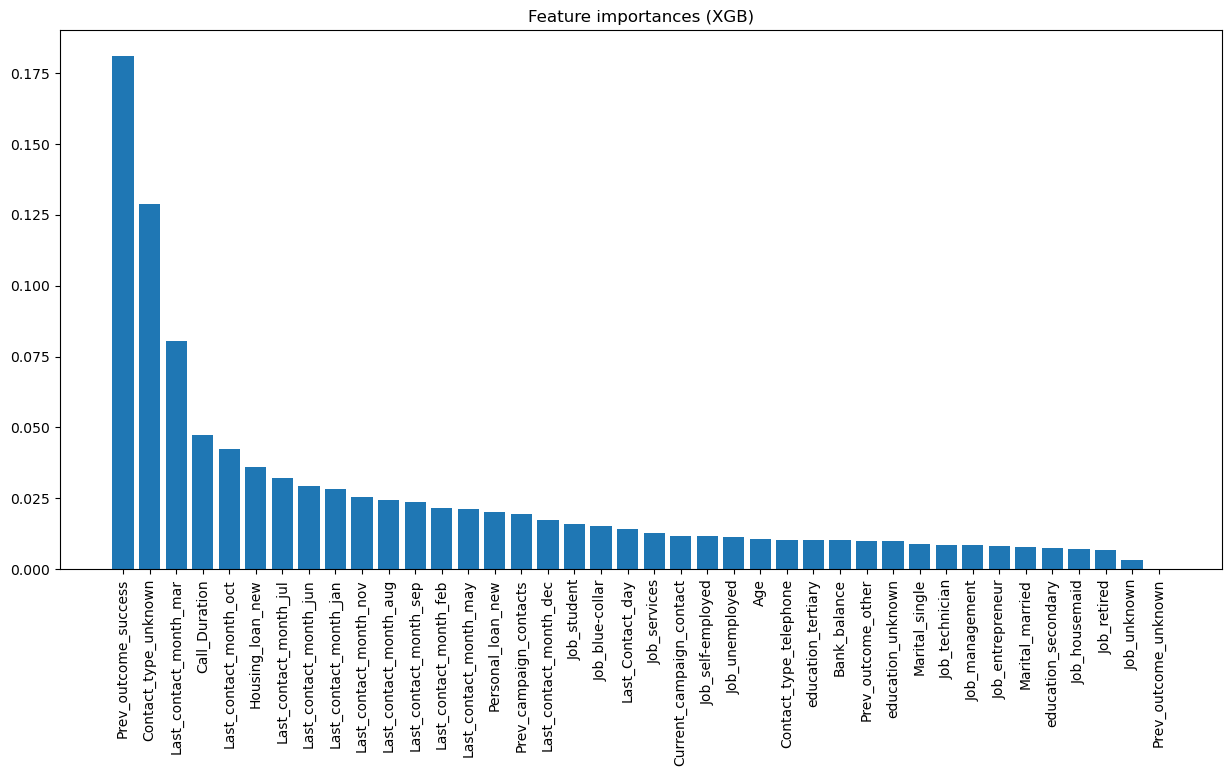

In [79]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [80]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[989, 190],
       [130, 922]], dtype=int64)

In [82]:
#Accuracy Rate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model_xgb.predict(X_test))
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8566


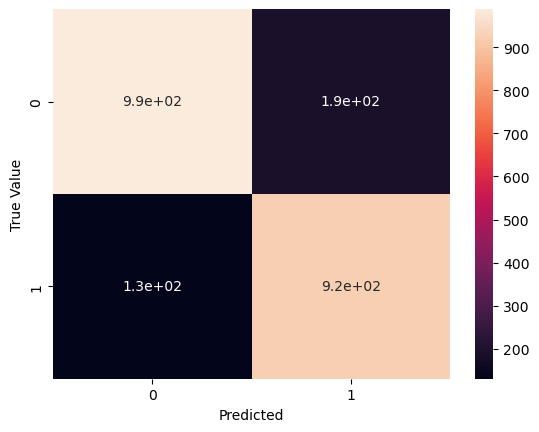

In [81]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()